In [5]:
#Bruno Marra de Melo - 3029

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format

In [6]:
#Roteiro da atividade

renda = pd.read_csv('/code/src/Atividades/atividade3/renda_populacao.csv', index_col=False, header=None, squeeze=True)
renda.describe()

count     10000.00
mean      36210.55
std       46539.07
min         391.72
25%       11205.69
50%       22006.79
75%       43049.55
max     1119768.63
Name: 0, dtype: float64

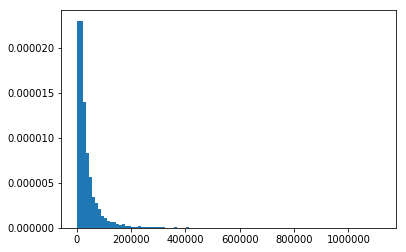

In [11]:
count, bins, ignored = plt.hist(renda, 100, normed=True, align='mid')
plt.show()

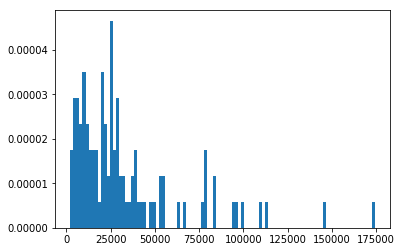

count      100.00
mean     33157.28
std      31483.34
min       2220.83
25%      11380.41
50%      25017.05
75%      39522.24
max     174071.85
Name: 0, dtype: float64

In [16]:
amostra = renda.sample(100)
count, bins, ignored = plt.hist(amostra, 100, normed=True, align='mid')
plt.show()
amostra.describe()

In [27]:
def gerarAmostra(samples):
    medias = []

    for i in range(0,samples):
        sample = renda.sample(100)
        media = sample.mean()
        medias.append(media)

    count, bins, ignored = plt.hist(medias, 100, normed=True, align='mid')
    plt.show()

    media = np.mean(medias)
    erro_padrao = renda.std()/np.sqrt(len(medias))

    print("Média: " + str(media))
    print("Erro padrão: " + str(erro_padrao))

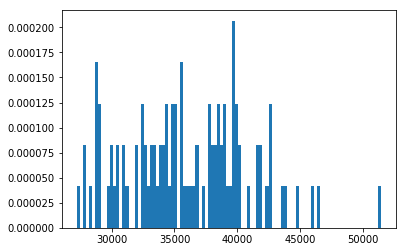

Média: 36034.555307999995
Erro padrão: 4653.906522305308


In [31]:
gerarAmostra(100)

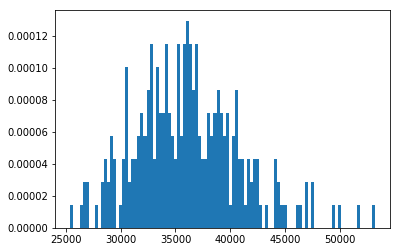

Média: 36102.943498
Erro padrão: 2943.3889255995978


In [32]:
gerarAmostra(250)

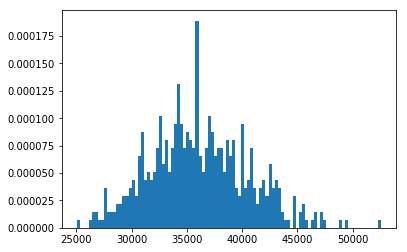

Média: 36116.1359014
Erro padrão: 2081.290268960862


In [33]:
gerarAmostra(500)

In [37]:
amostral = pd.read_csv(
    '/code/src/Atividades/atividade3/renda_amostra1.csv', index_col=False, header=None, squeeze=True
)

In [52]:
def getDistancia(populacao, amostra):
    media_populacao = populacao.mean()
    media_amostra = np.mean(amostra)
    erro_padrao = populacao.std() / np.sqrt(len(amostra))
    
    distancia = abs(media_amostra - media_populacao) / erro_padrao
    return distancia

In [53]:
print("A diferença entre a média da amostra é de %.3f erros padrões" % getDistancia(renda, amostral))

A diferença entre a média da amostra é de 0.149 erros padrões


In [54]:
#Atividade
#Ler dados de uma população de pesos (pesos_populacao.csv)

pesos = pd.read_csv(
    '/code/src/Atividades/atividade3/pesos_populacao.csv', index_col=False, header=None, squeeze=True
)
pesos.describe()

count   10000.00
mean      161.99
std        15.05
min       103.25
25%       151.95
50%       161.93
75%       172.20
max       220.32
Name: 0, dtype: float64

In [59]:
def isDistanceInside(distance):
    if(distance <= 2):
        print("A amostra muito provavelmente está contida na população, visto que a distância entre os erros padrões é de %.3f que é menor do que 2 desvios padrões" % distance)
    else:
        print("A amostra muito provavelmente não está contida na população, visto que a distância entre os erros padrões é de %.3f que é maior do que 2 desvios padrões" % distance)

In [67]:
amostra_pesos1 = pd.read_csv(
    '/code/src/Atividades/atividade3/pesos_amostra1.csv', index_col=False, header=None, squeeze=True
)

distance = getDistancia(pesos, amostra_pesos1)
isDistanceInside(distance)

A amostra muito provavelmente está contida na população, visto que a distância entre os erros padrões é de 0.068 que é menor do que 2 desvios padrões


In [63]:
amostra_pesos2 = pd.read_csv(
    '/code/src/Atividades/atividade3/pesos_amostra2.csv', index_col=False, header=None, squeeze=True
)

distance = getDistancia(pesos, amostra_pesos2)
isDistanceInside(distance)

A amostra muito provavelmente não está contida na população, visto que a distância entre os erros padrões é de 59.248 que é maior do que 2 desvios padrões


In [64]:
amostra_pesos3 = pd.read_csv(
    '/code/src/Atividades/atividade3/pesos_amostra3.csv', index_col=False, header=None, squeeze=True
)

distance = getDistancia(pesos, amostra_pesos3)
isDistanceInside(distance)

A amostra muito provavelmente não está contida na população, visto que a distância entre os erros padrões é de 32.046 que é maior do que 2 desvios padrões


In [65]:
amostra_pesos4 = pd.read_csv(
    '/code/src/Atividades/atividade3/pesos_amostra4.csv', index_col=False, header=None, squeeze=True
)

distance = getDistancia(pesos, amostra_pesos4)
isDistanceInside(distance)

A amostra muito provavelmente não está contida na população, visto que a distância entre os erros padrões é de 5.099 que é maior do que 2 desvios padrões


In [68]:
distance = getDistancia(amostra_pesos2, amostra_pesos3)
print("Como a distância entre os erros padrões é %.3f que é maior do que 2, a probabilidade é baixa deles serem da mesma população" % distance)

Como a distância entre os erros padrões é 69.027 que é maior do que 2, a probabilidade é baixa deles serem da mesma população
